In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file = 'final_data/batting_dataFinal.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,2B,3B,BA,BB,HBP,HOF,HR,IBB,OBP,...,runs,seasons,WAR,BA.1,WAR.1,OBP.1,OPS.1,SLG.1,seasons.1,predictions
0,1,35.00,12.02,0.277011,19.01,0.07,0,1.06,0.07,0.288029,...,227.0,7.0,2.89,0.277011,2.89,0.288029,0.615584,0.327555,7.0,0
1,2,19.00,8.02,0.254054,5.03,0.06,0,1.05,0.06,0.259129,...,106.0,6.0,0.20,0.254054,0.20,0.259129,0.564791,0.305662,6.0,0
2,3,581.00,142.00,0.332587,983.00,32.16,0,97.10,0.27,0.392578,...,1996.0,27.0,93.92,0.332587,93.92,0.392578,0.837679,0.445101,27.0,0
3,9,15.02,16.02,0.243043,8.01,0.06,0,0.06,0.06,0.254181,...,109.0,6.0,0.80,0.243043,0.80,0.254181,0.584867,0.330686,6.0,0
4,20,78.00,14.03,0.269424,14.03,0.09,0,5.05,0.09,0.273697,...,405.0,9.0,8.47,0.269424,8.47,0.273697,0.593751,0.320054,9.0,0


In [3]:
# MODEL PREDICTION: TRUE POSITIVE
hof_true = df[(df['HOF'] == 1) & (df['predictions'] == 1)]
# MODEL PREDICTION: FALSE NEGATIVE
hof_false = df[(df['HOF'] == 1) & (df['predictions'] == 0)]
# MODEL PREDICTION: FALSE POSITIVE
false_nonHOF = df[(df['HOF'] == 0) & (df['predictions'] == 1)]
# MODEL PREDICTION: TRUE NEGATIVE
true_nonHOF = df[(df['HOF'] == 0) & (df['predictions'] == 0)]

In [4]:
# CREATE DICTIONARY OF AVERAGE STATS
def statsDict(df, a):
    ba = df['BA'].mean()
    hr = df['HR'].mean()
    obp = df['OBP'].mean()
    ops = df['OPS'].mean()
    slg = df['SLG'].mean()
    seas = df['seasons'].mean()
    war = df['WAR'].mean()
    cnt = df.shape[0]
    d = {
        'seasons': round(seas,1),
        'BA': round(ba,3),
        'HR':round(hr,2),
        'OBP':round(obp,3),
        'OPS':round(ops,3),
        'SLG':round(slg,3),
        'WAR':round(war,2),
        'CAT': a,
        'Players': cnt
    }
    return d

In [5]:
# LIST OF DICTIONARIES
collect = [statsDict(true_nonHOF,'True Negative'), statsDict(false_nonHOF,'False Positive'), 
           statsDict(hof_true,'True Positive'), statsDict(hof_false,'False Negative')]
# CONVERT AVERAGE DICTS TO A DF
overall = pd.DataFrame(collect)
overall.head()

,BA,CAT,HR,OBP,OPS,Players,SLG,WAR,seasons
0,0.227,True Negative,32.32,0.286,0.614,4551,0.329,4.91,9.5
1,0.291,False Positive,201.61,0.362,0.816,34,0.454,43.84,16.4
2,0.278,True Positive,167.18,0.349,0.772,603,0.423,35.86,16.3
3,0.267,False Negative,87.79,0.335,0.722,74,0.387,18.83,13.7


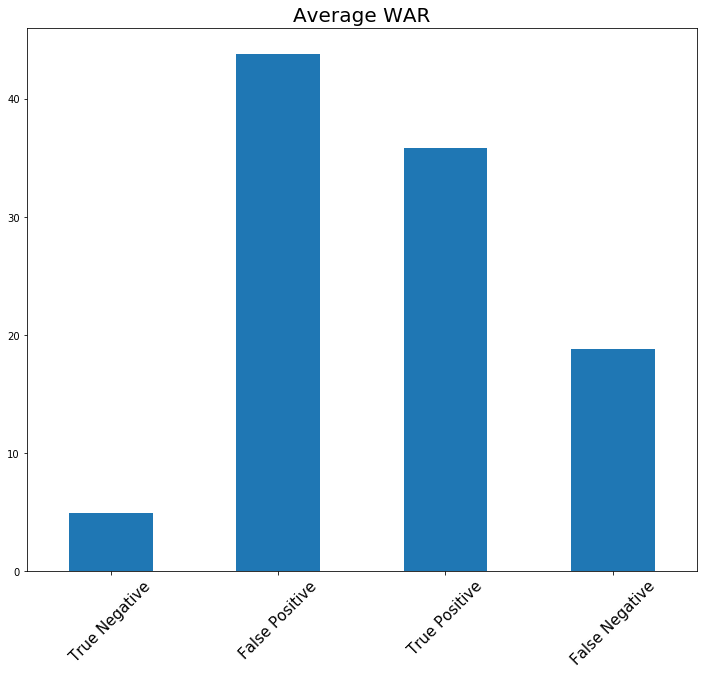

In [6]:
war_plot = overall['WAR'].plot(kind='bar', figsize=(12,10))
war_plot.set_xticklabels(overall['CAT'], rotation=45, fontsize=15)
plt.title("Average WAR", fontsize=20)
plt.savefig('final_data/WAR.png')
plt.show()

In [7]:
file = 'final_data/pitcher_dataFinal.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,ERA,HOF,Opposing_BA,completed,firstName,games,hits,homeruns,lastName,...,walks,wins,WAR,ERA.1,wins.1,strikes.1,games.1,seasons.1,Opposing_BA.1,predictions
0,3,2.952857,0,0.090000,126.00,William Charles,165.0,1532.0,17.02,Fisher,...,77.01,57.01,-2.27,2.952857,57.01,99.0,165.0,7.0,0.090000,0
1,7,3.250625,0,0.106250,525.00,Robert T.,578.0,5591.0,69.02,Mathews,...,533.00,297.00,-7.09,3.250625,297.00,1366.0,578.0,16.0,0.106250,0
2,8,3.026667,0,0.066667,227.00,John Dickson,237.0,2420.0,19.00,McBride,...,172.00,149.01,0.12,3.026667,149.01,106.0,237.0,6.0,0.066667,0
3,14,2.384286,0,0.087143,281.01,Albert Goodwill,347.0,3271.0,15.02,Spalding,...,156.01,253.00,6.76,2.384286,253.00,142.0,347.0,7.0,0.087143,0
4,18,2.766250,0,0.050000,228.00,George,250.0,2693.0,17.02,Zettlein,...,148.00,129.00,-3.62,2.766250,129.00,115.0,250.0,8.0,0.050000,0


In [8]:
# MODEL PREDICTION: TRUE POSITIVE
hof_true = df[(df['HOF'] == 1) & (df['predictions'] == 1)]
# MODEL PREDICTION: FALSE NEGATIVE
hof_false = df[(df['HOF'] == 1) & (df['predictions'] == 0)]
# MODEL PREDICTION: FALSE POSITIVE
false_nonHOF = df[(df['HOF'] == 0) & (df['predictions'] == 1)]
# MODEL PREDICTION: TRUE NEGATIVE
true_nonHOF = df[(df['HOF'] == 0) & (df['predictions'] == 0)]

In [10]:
df.columns

Index(['Unnamed: 0', 'ERA', 'HOF', 'Opposing_BA', 'completed', 'firstName',
       'games', 'hits', 'homeruns', 'lastName', 'losses', 'outs_pitched',
       'player_id', 'runs_earned', 'saves', 'seasons', 'shutouts', 'started',
       'strikes', 'walks', 'wins', 'WAR', 'ERA.1', 'wins.1', 'strikes.1',
       'games.1', 'seasons.1', 'Opposing_BA.1', 'predictions'],
      dtype='object')

In [17]:
# CREATE DICTIONARY OF AVERAGE STATS
def statsDict(df, a):
    era = df['ERA'].mean()
    oba = df['Opposing_BA'].mean()
    op = df['outs_pitched'].mean()
    strikes = df['strikes'].mean()
    wins = df['wins'].mean()
    loss = df['losses'].mean()
    seas = df['seasons'].mean()
    war = df['WAR'].mean()
    cnt = df.shape[0]
    d = {
        'seasons': round(seas,1),
        'ERA': round(era,3),
        'OBA':round(oba,2),
        'OP':round(op,3),
        'STRKS':round(strikes,1),
        'WIN':round(wins,1),
        'LOSS':round(loss,2),
        'WAR': round(war,2),
        'CAT': a,
        'Players': cnt
    }
    return d

In [18]:
# LIST OF DICTIONARIES
collect = [statsDict(true_nonHOF,'True Negative'), statsDict(false_nonHOF,'False Positive'), 
           statsDict(hof_true,'True Positive'), statsDict(hof_false,'False Negative')]
# CONVERT AVERAGE DICTS TO A DF
overall = pd.DataFrame(collect)
overall.head()

,CAT,ERA,LOSS,OBA,OP,Players,STRKS,WAR,WIN,seasons
0,True Negative,4.655,49.21,0.30,2603.996,2709,482.8,0.03,48.1,9.2
1,False Positive,3.495,129.51,0.38,7664.400,20,1365.8,1.24,160.2,15.4
2,True Positive,3.832,126.57,0.28,7444.270,345,1411.2,1.02,157.1,16.4
3,False Negative,4.438,85.38,0.26,4774.098,41,836.5,4.26,96.1,13.5


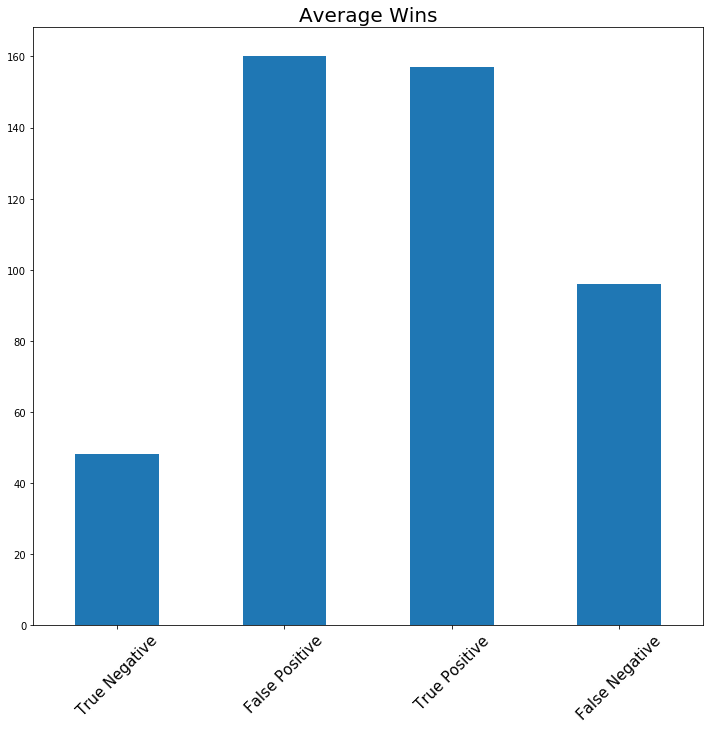

In [23]:
win_plot = overall['WIN'].plot(kind='bar', figsize=(12,11))
win_plot.set_xticklabels(overall['CAT'], rotation=45, fontsize=15)
plt.title("Average Wins", fontsize=20)
plt.savefig('final_data/WIN.png')
plt.show()